<a href="https://colab.research.google.com/github/mjgpinheiro/Physics_models/blob/main/Quantum_Thermalization_and_Entropy_Influence_A_Wigner_Function_Perspective.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 22.4 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/qutip/__init__.py:66: UserWarning: The new version of Cython, (>= 3.0.0) is not supported.
  warnings.warn(
<ipython-input-1-2f423aa6d533>:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


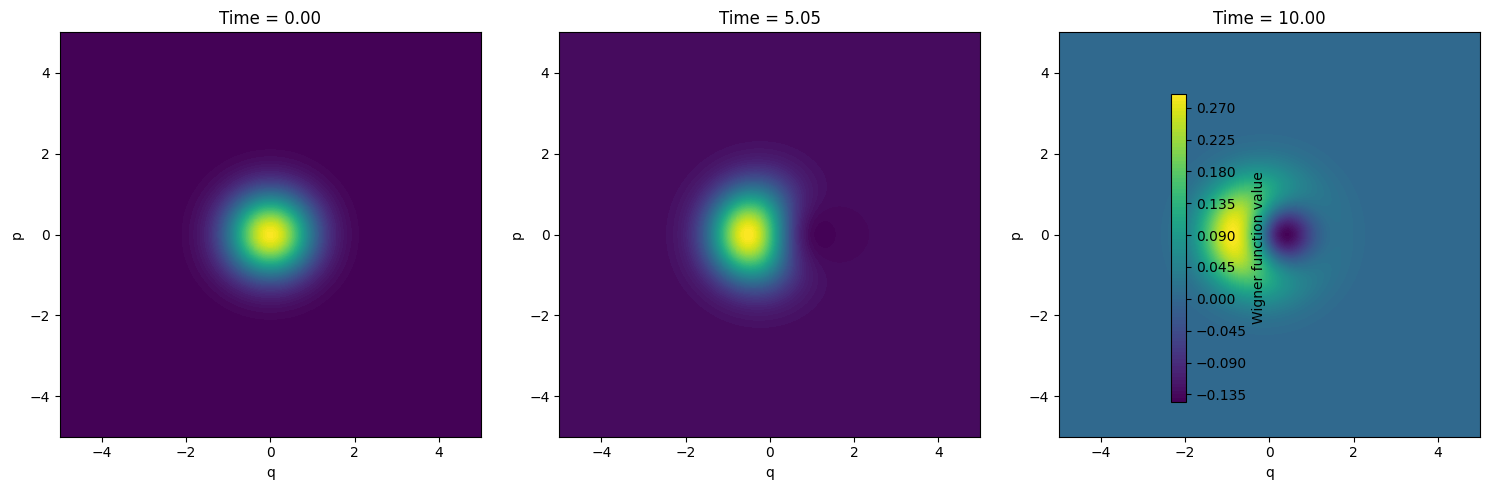

In [ ]:
!pip install qutip

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from qutip import wigner, Qobj, basis, sigmax, sigmay, sigmaz, qeye

# Define constants for the system (using arbitrary units)
omega = 1.0  # Frequency of the harmonic oscillator
lambda_param = 0.1  # Strength of the perturbation
T = 0.05  # Temperature-like parameter for scaling the entropy term
hbar = 1  # Reduced Planck's constant
time_points = np.linspace(0, 10, 100)  # Time points for simulation

# Define the Hamiltonian of the system
H = omega * (sigmax() + sigmay() + sigmaz()) / np.sqrt(3)

# Define an additional Hamiltonian-like term to symbolize the entropy's influence
H_entropy = T * (sigmay() + sigmaz()) / np.sqrt(2)  # Simplified model

# Effective Hamiltonian incorporating the entropy's symbolic influence
H_eff = H - H_entropy

# Define the initial state of the system (ground state)
psi0 = basis(2, 0)

# Define the time evolution function using the commutator with the effective Hamiltonian
def time_evolution(t, y):
    # Convert the state back to a density matrix (Qobj)
    rho = Qobj(y.reshape((2,2)), dims=[[2], [2]])

    # Calculate the commutator [H_eff, rho]
    commutator = -1j * (H_eff * rho - rho * H_eff)

    # Flatten the result to vector form and return real part (imaginary part should be zero for valid ρ)
    return commutator.full().flatten().real

# Initial state vector (flattened density matrix)
y0 = psi0 * psi0.dag()
y0_vec = y0.full().flatten().real

# Solve the differential equation
sol = solve_ivp(time_evolution, [time_points[0], time_points[-1]], y0_vec, t_eval=time_points, method='RK45')

# Visualize the evolution of the Wigner function at different times
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
times_to_plot = [0, len(time_points) // 2, -1]

for i, time_idx in enumerate(times_to_plot):
    # Extract the density matrix at this time
    rho_t = Qobj(sol.y[:,time_idx].reshape((2,2)), dims=[[2], [2]])

    # Calculate the Wigner function
    W = wigner(rho_t, np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))

    # Plot the Wigner function
    cont = axes[i].contourf(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100), W, 100)
    axes[i].set_title(f'Time = {time_points[time_idx]:.2f}')
    axes[i].set_xlabel('q')
    axes[i].set_ylabel('p')

fig.colorbar(cont, ax=axes.ravel().tolist(), shrink=0.8, label='Wigner function value')
plt.tight_layout()
plt.show()


Description:
Explanation of Adjustments and Plot Interpretations:
Effective Hamiltonian Heff: This includes Hentropy, a Hamiltonian-like term that symbolizes entropy's influence by favoring state dispersion or spread in phase space over time. The term is subtracted to mimic the effect of entropy increasing the system's disorder.
Simulation Process: Utilizes Heff to simulate the time evolution, accounting for the entropy's conceptual impact.
Visualizations: The three plots represent the system's quantum state in phase space at different times, showcasing how the entropy-like influence alters the state's spread.
Early Stage: Initially confined or localized state.
Mid Simulation: State begins to spread, symbolizing entropy increase.
Late Stage: State further spreads in phase space, indicating increased disorder, consistent with the expected behavior due to entropy's effect in a quantum system.